Sudipa Koner

Dataset used - https://www.kaggle.com/code/sabahattincag/beginner-friendly-titanic-data-preparation

Name: RMS Titanic

Owner: White Star Line

Route	Southampton to New York City

Cost	£1.5 million (£150 million in 2019)

The Titanic was a British passenger liner that famously sank on its maiden voyage from Southampton, England, to New York City, USA, on April 15, 1912. Here are some key details about the Titanic's journey:

1. Departure: The Titanic set sail on April 10, 1912, from Southampton, England. It made brief stops at Cherbourg, France, and Queenstown (now Cobh), Ireland, to pick up additional passengers.

2. Ship's Specifications: The Titanic was one of the largest and most luxurious ships of its time. It measured about 882 feet (268 meters) in length, with a beam (width) of 92 feet (28 meters) and a gross tonnage of approximately 46,328 tons.

3. Passengers and Crew: The Titanic was carrying around 2,224 passengers and crew members on its voyage. Among them were some of the wealthiest individuals of the time, as well as immigrants seeking a better life in America.

4. Onboard Amenities: The ship offered numerous amenities, including luxurious cabins, a swimming pool, a gymnasium, Turkish baths, a squash court, various dining options, and more.

5. Collision with an Iceberg: On the night of April 14, 1912, at approximately 11:40 PM ship's time, the Titanic struck an iceberg. The iceberg tore holes in the ship's hull, causing it to flood with water.

7. Sinking: Despite efforts to contain the flooding and deploy lifeboats, the Titanic's design did not have enough lifeboats to accommodate all passengers and crew. As a result, the evacuation was chaotic, and many lifeboats were launched with fewer occupants than their capacity allowed.

8. Rescue Efforts: The nearby RMS Carpathia responded to Titanic's distress calls and arrived on the scene around 4:00 AM on April 15, 1912, about two hours after the ship sank. The Carpathia rescued around 705 survivors from lifeboats and brought them to New York City.

9. Casualties: It is estimated that over 1,500 people lost their lives in the disaster, making it one of the deadliest commercial peacetime maritime disasters in modern history.

The sinking of the Titanic had a significant impact on maritime regulations and safety measures. It remains one of the most famous and tragic events in history. Many books, movies, and documentaries have been produced over the years to tell the story of the Titanic and its ill-fated journey.

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## Importing libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
td = pd.read_csv('train.csv')

In [4]:
td.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
td.shape


(891, 12)

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing

In [7]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
td.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
## droping "Cabin" column
td = td.drop(columns="Cabin",axis=1)

In [10]:
# replacing the missing values of "Age" column with mean value
td['Age'].fillna(td['Age'].mean(),inplace=True)


In [11]:
td[td['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [12]:
td['Embarked'].mode()[0]

'S'

In [13]:
td['Embarked'].fillna(td['Embarked'].mode()[0],inplace = True)

In [14]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
td = td.drop(columns="Name",axis=1)

## Data Analysis

In [16]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
td['Survived'].value_counts() ##	0 = No, 1 = Yes


0    549
1    342
Name: Survived, dtype: int64

In [18]:
td.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,male,27.000000,0,0,211536,13.00,S
887,888,1,1,female,19.000000,0,0,112053,30.00,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,male,26.000000,0,0,111369,30.00,C
890,891,0,3,male,32.000000,0,0,370376,7.75,Q


In [19]:
td['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Data Visualization

c:\users\sudipa\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

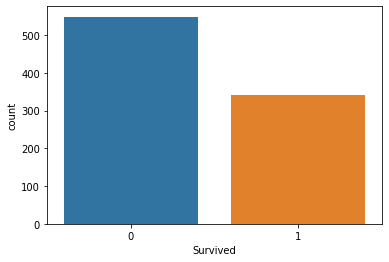

In [20]:
sns.countplot('Survived',data = td)  ## 	0 = No, 1 = Yes

c:\users\sudipa\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

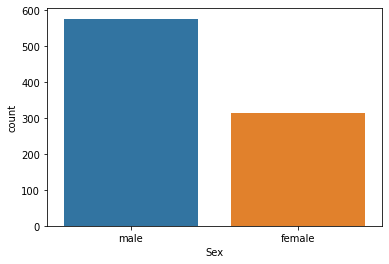

In [21]:
sns.countplot('Sex',data = td)

c:\users\sudipa\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

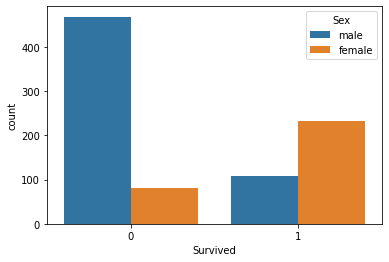

In [22]:
sns.countplot('Survived', hue='Sex',data = td)

c:\users\sudipa\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

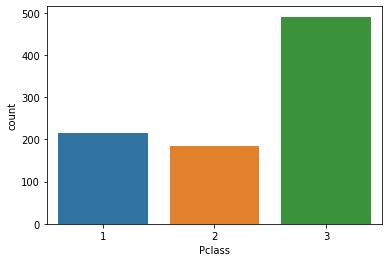

In [23]:
sns.countplot('Pclass',data = td)

c:\users\sudipa\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

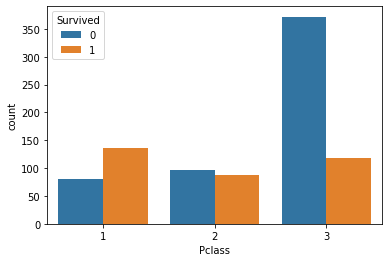

In [24]:
sns.countplot('Pclass',hue='Survived',data = td)

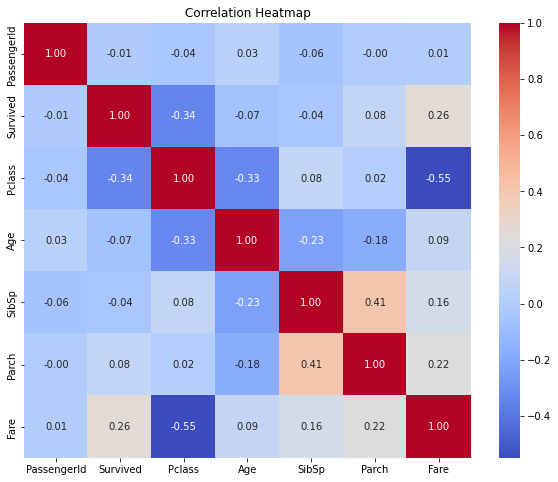

In [25]:
# Create a correlation matrix
correlation_matrix = td.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# Create a new DataFrame with 'Survived', 'SibSp', and 'Parch' columns
survival_data = td[['Survived', 'SibSp', 'Parch']]

# Compute the correlation matrix
correlation_matrix = survival_data.corr()

# Print the correlation matrix
print(correlation_matrix)

          Survived     SibSp     Parch
Survived  1.000000 -0.035322  0.081629
SibSp    -0.035322  1.000000  0.414838
Parch     0.081629  0.414838  1.000000


### Encoding

In [27]:
td['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
td['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
td.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [30]:
td.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0


## Separating target column

In [31]:
x = td.drop(columns = ['PassengerId','Ticket','SibSp','Parch','Survived'],axis = 1)
y = td['Survived']

In [32]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x_train.shape

(712, 5)

In [35]:
x_test.shape

(179, 5)

## Model Building

In [36]:
logreg_model = LogisticRegression()

In [37]:
logreg_model.fit(x_train, y_train)

LogisticRegression()

In [38]:
x_train_pred = logreg_model.predict(x_train)

In [39]:
accuracy = accuracy_score(y_train,x_train_pred)

In [40]:
print(f"Accuracy score of Training data: {accuracy:.3f}")

Accuracy score of Training data: 0.788


In [41]:
x_test_pred = logreg_model.predict(x_test)

In [42]:
# Assess the model's accuracy
accuracy2 = accuracy_score(y_test, x_test_pred)
print(f"Model Accuracy of Test data: {accuracy2:.3f}")

Model Accuracy of Test data: 0.793


In [43]:
# Assuming you have new data in a pandas DataFrame called 'new_data'
# Replace the following sample data with your actual new data
new_data = pd.DataFrame({
    'Pclass': [1, 3, 2, 1],
    'Sex': [0, 1, 1, 0],
    'Age': [30, 25, 40, 35],
    'Fare': [100, 20, 50, 80],
    'Embarked': [0, 1, 0, 1]
})

# Use the trained model to predict on the new data
predictions = logreg_model.predict(new_data)

# Print the predictions
print("Predictions for new data:")
print(predictions)


Predictions for new data:
[0 1 1 0]


In [44]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [45]:
import joblib

# Assuming you have trained and named your model as 'logreg_model'
joblib.dump(logreg_model, 'trained_model.pkl')

['trained_model.pkl']